# BY: Mohamed Ashraf Gaber

## This is a model predict what is the number of a handwritten digits.
### The Data called MNIST dataset and it has two versions.
### The first one has 70000 instance (28 * 28).
### And the second on has 1797 instance (8 * 8). 
### Here I used the small one.

## Importing libraries we will need.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

### Loading the data.

In [2]:
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

## Some exploratory data and data visualization.

0


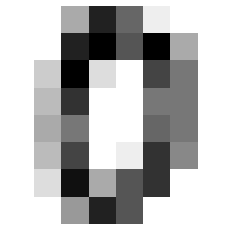

In [3]:
some_digit = X[0]
some_digit = some_digit.reshape(8, 8)
plt.imshow(some_digit, cmap='binary')
plt.axis('off')

print(y[0])
plt.show()

1


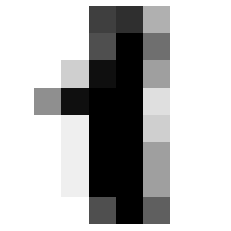

In [4]:
some_digit = X[1]
some_digit = some_digit.reshape(8, 8)
plt.imshow(some_digit, cmap='binary')
plt.axis('off')

print(y[1])
plt.show()

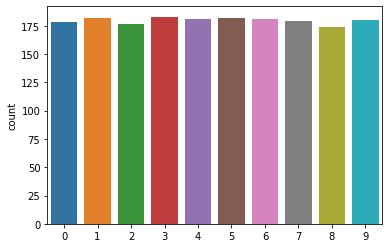

In [5]:
sns.countplot(y)

### Splitting the data into a training set and testing set.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### First I will try to use LogisticRegression model.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_model = LogisticRegression(max_iter=5000, random_state=42)

log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluating the model.
### It has 97.2% accuracy. Not bad but I will try to get better.

In [10]:
from sklearn.metrics import accuracy_score

prediction = log_model.predict(X_test)

print(accuracy_score(y_test, prediction))

0.9722222222222222


### Now I will create a pipeline with KMeans and LogisticRegression.
### KMeans will just help to get better accuracy.

In [11]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [12]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

### And I got 97.59% accuracy.

In [14]:
prediction = pipeline.predict(X_test)

accuracy_score(y_test, prediction)

0.975925925925926

### This loop will show me what is the best n_clusters value for the KMeans.

In [15]:
error_rate = []

for i in range(20, 101, 10):
    pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=i, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
    
    pipeline.fit(X_train, y_train)
    
    pred = pipeline.predict(X_test)
    
    error_rate.append(np.mean(y_test != pred))

### The best value is 100.

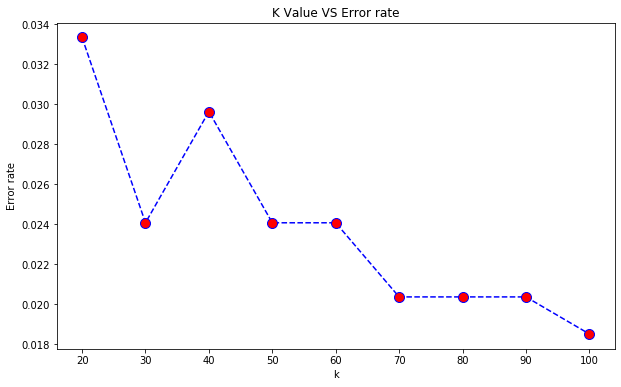

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(range(20, 101, 10), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)

plt.title('K Value VS Error rate')
plt.xlabel('k')
plt.ylabel('Error rate')

plt.show()

### Create the pipeline again with n_clusters = 100 and check the accuracy.

In [17]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=100, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=100, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

### The accuracy is 98.14%.

In [19]:
prediction = pipeline.predict(X_test)

accuracy_score(y_test, prediction)

0.9814814814814815

### Last thing I'll try to train KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

### To get the best value of K, I'll do the same loop.

In [21]:
error_rate = []

for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    pred = knn.predict(X_test)
    
    error_rate.append(np.mean(y_test != pred))

### The best value for K is 6.

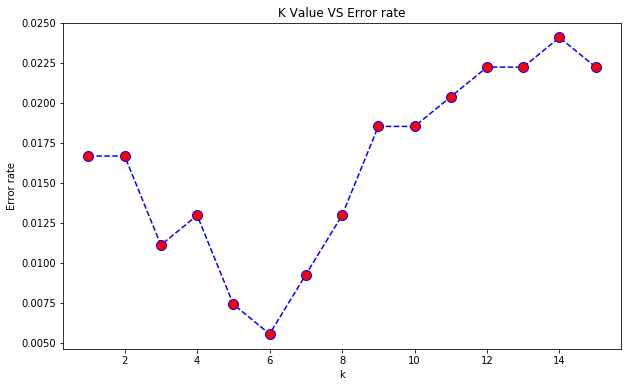

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 16), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)

plt.title('K Value VS Error rate')
plt.xlabel('k')
plt.ylabel('Error rate')

plt.show()

## Fiting the model.

In [23]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

## Getting the prediction.

In [24]:
prediction = knn.predict(X_test)

## And I got the best accuracy 99.44%.

In [25]:
accuracy_score(y_test, prediction)

0.9944444444444445